In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime
import random 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
df = pd.read_csv('output.csv', lineterminator='\n')

/home/domantas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,28,29,30,34,38,40,41,42,43,44,45,46,47,48,49,50,53,54,55,56,58,59,61,62,64,65,67,68,69,70,74,75,77,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df[(~df.scrape_date.isnull()) & (df.breadcrumbs != '[]')]

,url,last_updated,ad_priority,title,price,phone,description,contact_name,contact_location,article_id,image,breadcrumbs,scrape_date,Date of manufacture,Motorcycle type,Engine,Fuel type,Cooling system type,"Kerb weight, kg",New / used,Features / equipment,memorized,update_timestamp,Price,Export,Categories,Type,Purpose of a boat,Manufacturer,Model,Damage,"Length overall, m","Draft, m","Beam, m",Hull material,"Fuel tank capacity, l",Number of toilets,"Weight, kg",Engine(s) type,Number of engines,Engine model,Size,Layout,Euro standard,Mileage,VIN number,Transmission type,Boom type,"Lifting height, mm","Fork length, mm","Lifting capacity, kg",Work hours,Number of seats,Steering wheel,Gearbox,Driven wheels,Part No.,"Volume, m³",Trailer / semi-trailer,Axles make,Number of axles,"Curb weight, kg","Gross weight, kg","Operating width, m","Range, mm","Lifting moment, kNm",Number of passengers,Engine make,Vehicle type,Wheel type,"Size, """,Bolt pattern,"Spacing between holes, mm","Centerbore diameter, mm","Quantity, units",Condition,"Rim width, """,Season,"Remaining tread, %",Year of manufacture,"Offset (ET), mm",Discounts for long term rental,"Structural height, mm",Fit cars
0,https://en.autoplius.lt/ads/shineray-kita-250c...,2020-01-20T00:00:00+02:00,0.55,"Shineray -kita- 250cc, atv / quad / trikes",1285€,3.706863e+10,\n VISOS KAINOS EURAIS SU P...,"HERADAS, UAB","Kėdainiai, Lithuania",ID:A43643,['https://autoplius-img.dgn.lt/ann_3_38261795/...,"['Classifieds', 'Motociklai', 'Shineray', '-ki...",2020-01-26 17:11:47,2019,ATV / Quad / Trikes,"250 cm³, 16 HP (12kW)",Petrol,Air cooling,160 kg,New,NaN,63.0,Updated 6 days ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://en.autoplius.lt/ads/ducati-supermoto-4...,2020-01-25T00:00:00+02:00,0.55,"Ducati, supermoto",Price is negotiable,3.706078e+10,\n Naudotos motociklų detal...,"GTV SOLUTIONS, UAB","Vilnius, Lithuania",ID:A46186,['https://autoplius-img.dgn.lt/ann_3_3269783/d...,"['Classifieds', 'Dalys', 'Motociklųdalys', 'Du...",2020-01-26 17:11:48,NaN,Supermoto,900 cm³,NaN,NaN,NaN,Used,NaN,4.0,Updated 1 days ago,Price is negotiable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.autoplius.lt/ads/yamaha-r6-superbik...,2020-01-21T00:00:00+02:00,0.55,"Yamaha R6, superbikes",70€,3.706997e+10,\n R6 199 Remas su dokum...,"ZIPA, UAB","Pasvalys, Lithuania",ID:A46216,['https://autoplius-img.dgn.lt/ann_3_78834753/...,"['Classifieds', 'Motociklųdalys', 'Yamaha', 'R6']",2020-01-26 17:11:48,NaN,Superbikes,600 cm³,NaN,Liquid cooling,NaN,Used,NaN,5.0,Updated 5 days ago,NaN,70 €,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.autoplius.lt/ads/kawasaki-zx-zx-r-n...,2020-01-21T00:00:00+02:00,0.55,"Kawasaki ZX/ZX-R (Ninja), superbikes",15€,3.706997e+10,\n 636 - bagažinė 55 ...,"ZIPA, UAB","Pasvalys, Lithuania",ID:A46316,['https://autoplius-img.dgn.lt/ann_3_79825109/...,"['Classifieds', 'Motociklųdalys', 'Kawasaki', ...",2020-01-26 17:11:49,NaN,Superbikes,636 cm³,NaN,Liquid cooling,NaN,Used,NaN,2.0,Updated 5 days ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.autoplius.lt/ads/honda-pantheon-sco...,2019-12-23T00:00:00+02:00,0.55,"Honda Pantheon, scooters / mopeds",Price is negotiable,3.706872e+10,\n Hond

In [ ]:
r = requests.get('https://en.autoplius.lt/ads/jcb-535-95-agri-super-warehouse-equipment-10351305.html')
prod_soup = BeautifulSoup(r.text, "html.parser")

In [ ]:
USER_AGENT = "Mozilla/5.0 (Windows NT 5.1; rv:9.0.1) Gecko/20100101 Firefox/9.0.1"
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': USER_AGENT,
    }

)
r = requests.get('https://en.autoplius.lt/ads/volkswagen-touareg-3-0-l-suv-off-road-2007-diesel-10283181.html', headers=headers)
prod_soup = BeautifulSoup(r.text, "html.parser")
r.status_code


In [2]:
import base64
import pytesseract
from PIL import Image
from io import BytesIO
import PIL.ImageOps

def decode_vin(encoded_vin):
    im = Image.open(BytesIO(base64.b64decode(encoded_vin))).resize((400, 50))
    return pytesseract.image_to_string(im)

r = requests.get('https://en.autoplius.lt/ads/dodge-charger-6-2-l-saloon-sedan-2015-petrol-9652821.html')
prod_soup = BeautifulSoup(r.text, "html.parser")
if len(re.findall('data:image/png;base64, .*"', r.text)):
    encoded_vin = re.sub('data:image/png;base64, ', '', re.findall('data:image/png;base64, .*"', r.text)[0][:-1])
    decoded_vin = decode_vin(encoded_vin)

In [15]:
im = Image.open('/home/domantas/Downloads/captcha_test.jpeg')

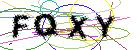

In [11]:
im

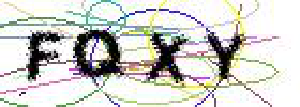

In [51]:
im_bin = Image.open('/home/domantas/Downloads/captcha_test.jpeg')
basewidth = 300  # in pixels
wpercent = (basewidth/float(im_bin.size[0]))
hsize = int((float(im_bin.size[1])*float(wpercent)))
im = im_bin.resize((basewidth, hsize), Image.NEAREST)
im

In [5]:
pytesseract.image_to_string(im)

''

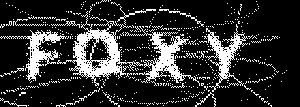

In [49]:
im = im.convert('L')
im = PIL.ImageOps.invert(im)
im = im.convert('1')
im

In [50]:
pytesseract.image_to_string(im)

''

In [ ]:
ind = np.unique(np.where(im_arr[6] == (255, 255, 255))[0])
ind, ind[1:], ind[:-1], ind[1:] - ind[:-1], np.where(ind[:-1] - ind[1:] == -1), [ind[i] for i in np.where(ind[:-1] - ind[1:] == -1)[0]]

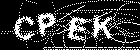

In [455]:
im = Image.open('/home/domantas/Downloads/captcha_5.jpeg')
im = im.convert('L')
im = PIL.ImageOps.invert(im)
im = im.convert('1')
rgb = im.convert('RGB')
im_arr = np.array(rgb)

def get_index(ind, tolerance = 6):
    res = []
    temp = []
    for i in range(ind.shape[0] - 1):
        temp.append(ind[i])
        if ind[i+1] - ind[i] == 1:
            temp.append(ind[i+1])
        else:
            if len(temp) > tolerance:
                res.extend(temp)
                temp = []
            else:
                temp = []
    return np.unique(res)
im

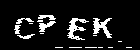

In [456]:
for row in im_arr:
    ind = np.unique(np.where(row == (255, 255, 255))[0])
    if ind.shape[0] > 1:
        for i in range(row.shape[0]):
            if i not in get_index(ind):
                row[i] = (0, 0, 0)
    elif ind.shape[0] == 1:
        row[ind[0]] = (0, 0, 0)   
        
Image.fromarray(im_arr)

In [457]:
pytesseract.image_to_string(Image.fromarray(im_arr), config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789', lang='eng')

'cP EK'

In [458]:
pytesseract.image_to_string(Image.fromarray(im_arr),config='-c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz -psm 6', lang='eng')

''

In [254]:
for row in im_arr:
    print(np.unique(np.where(row == (255, 255, 255))[0]))
    ind = np.unique(np.where(row == (255, 255, 255))[0])
    if ind.shape[0] > 1:
        for i in range(row.shape[0]):
            if i not in np.where(ind[:-1] - ind[1:] == -1)[0]:
                row[i] = (0, 0, 0)
    elif ind.shape[0] == 1:
        row[ind[0]] = (0, 0, 0)   
    print(np.unique(np.where(row == (255, 255, 255))[0]))
    print('***')

[48 50]
[]
***
[45 52]
[]
***
[ 43  54 112]
[]
***
[ 42  56 120]
[]
***
[ 39  68  69  70  71  72  74  75  76  77  78 112]
[]
***
[ 32  41  57  63  64  65  66  67  79  80  81  82  83 111]
[]
***
[ 34  36  40  60  61  62  84  85  86 111]
[]
***
[14 38 41 58 59 87 88]
[]
***
[10 13 15 17 18 20 22 24 25 40 43 45 56 57 89 90]
[]
***
[  8   9  11  26  28  29  30  46  48  49  55  58  91 109 114]
[8]
***
[  4   5   6  31  33  34  40  51  52  54  92  93 106 111]
[4]
***
[  1   3   7   9  11  13  15  17  19  21  24  26  29  32  35  37  39  41
  43  45  47  49  53  55  57  70  94 102 110]
[]
***
[  0  37  51  58  60  62  64  66  68  72  74  75  97 110]
[]
***
[39 40 42 50 56 64 71 76 78 80 81 83 87 96]
[]
***
[ 14  19  23  28  42  43  44  45  46  47  48  49  54  61  63  65  67  69
  96  97 110]
[]
***
[ 15  17  18  20  22  23  25  26  39  40  41  42  43  44  45  46  47  48
  49  50  52  58  68  71  72  73  75  77  79  81  98  99 110 113]
[15 17 18 23]
***
[ 15  16  17  18  19  20  21  23  24  25 

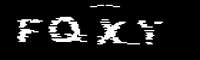

In [387]:
Image.fromarray(im_arr).resize((200, 60))

In [25]:
import cv2
import pytesseract
import re
from PIL import Image
# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('/home/domantas/Downloads/captcha_4.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = re.sub('[ ]*', '', pytesseract.image_to_string(invert, lang='eng', config='--psm 6')).upper()
res = re.findall('[a-zA-Z]{4}', data) if len(re.findall('[a-zA-Z]{4}', data)) else 'ABCD'
print(data)

# cv2.imshow('thresh', thresh)
# cv2.imshow('opening', opening)
# cv2.imshow('invert', invert)
# cv2.waitKey()

OE


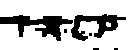

In [26]:
Image.fromarray(invert)

In [12]:
'asd'.upper()

'ASD'

In [40]:
import requests
import io
r = requests.get('https://en.autoplius.lt/utility/captcha/text')
Image.open(io.BytesIO(r.content))

In [59]:
image = Image.open(io.BytesIO(requests.get('https://en.autoplius.lt/utility/captcha/text').content))
gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = re.sub('[ ]*', '', pytesseract.image_to_string(invert, lang='eng', config='--psm 6')).upper()
res = re.findall('[a-zA-Z]{4}', data)[0] if len(re.findall('[a-zA-Z]{4}', data)) else 'ABCD'
print(res)

NUWX


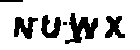

In [60]:
Image.fromarray(invert)

In [52]:
import numpy as np

In [54]:
io.BytesIO(requests.get('https://en.autoplius.lt/utility/captcha/text').content)